In [1]:
import torch
import csv
from glob import glob

/home/niedermayr/anaconda3/envs/punctum12/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
stats = {}
for e_file in glob("../datasets/*/evaluation.csv"):
    with open(e_file,"r") as f:
        lines = [l for l in csv.reader(f)]
        dataset = lines[1][0]
        steps = [float(col.split(" ")[1]) for col in lines[0][2:]]
        values = [float(col) for col in lines[1][2:]]
        stats[dataset] = (steps,values)

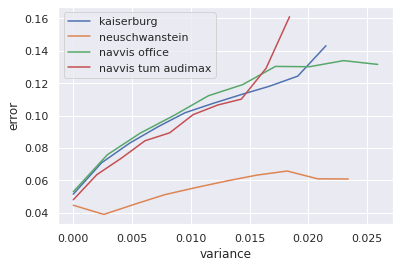

In [24]:
from cProfile import label
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

for (dataset,(steps,values)) in stats.items():
    plt.plot(steps,values,label=dataset.split("/")[1].replace("_",  " "))

plt.xlabel("variance")
plt.ylabel("error")
plt.legend()
plt.savefig("dataset_metrics.pdf")